# How Artificial Neural Networks Build Non-Linear Decision Boundaries to Classify Data

In [65]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [66]:
# Generate the dataset
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"set(y): {set(y)}")

X shape: (100, 2)
y shape: (100,)
set(y): {0, 1}


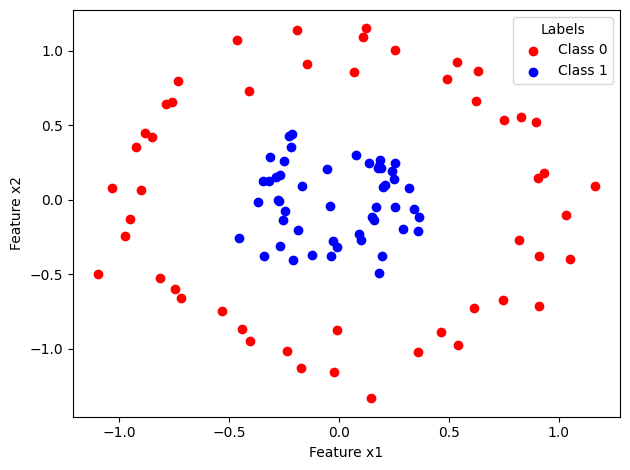

In [67]:
# Define colors for each class
colors = {0: 'red', 1: 'blue'}

# Plot the dataset with a legend and specific colors
for label in set(y):
    plt.scatter(X[y == label, 0], 
                X[y == label, 1], 
                color=colors[label], 
                label=f"Class {label}")

plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend(title="Labels")

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Save the plot
plt.savefig('labels.png', dpi=150)

plt.show()

In [68]:
# Define the grid for visualization
# -0.5 and +0.5: Add padding to ensure the grid extends slightly beyond the data points.
x1_min = X[:, 0].min() - 0.5
x1_max = X[:, 0].max() + 0.5

x2_min = X[:, 1].min() - 0.5
x2_max = X[:, 1].max() + 0.5

N = 100

# Create a 1D array of N evenly spaced values between x1_min and x1_max
x1 = np.linspace(x1_min, x1_max, N)
x2 = np.linspace(x2_min, x2_max, N)

print(f"x1 shape: {x1.shape}")
print(f"x2 shape: {x2.shape}")

x1 shape: (100,)
x2 shape: (100,)


In [69]:
# np.meshgrid(x1, x2) repeats the values of x1 across rows and the values of x2 across columns
x1_x1, x2_x_2 = np.meshgrid(x1, x2)

In [70]:
# x1_x1 is a grid of shape (N, N) with the same values in each row
x1_x1.shape

(100, 100)

In [71]:
# x2_x_2 is a grid of shape (N, N) with the same values in each column
x2_x_2.shape

(100, 100)

In [72]:
# np.c_ combines the arrays column-wise to create a 2D array where each row represents a point (x1, x2) in the grid
# Example: If x1_x1 and x2_x_2 describe a 100x100 grid, the grid will have 10,000 points with 2 coordinates,
# resulting in 10,000 rows and 2 columns.

grid = np.c_[x1_x1.ravel(), x2_x_2.ravel()]

grid_df = pd.DataFrame(grid, columns=["x1_x1", "x2_x2"])
grid_df

,x1_x1,x2_x2
0,-1.598143,-1.833764
1,-1.565170,-1.833764
2,-1.532198,-1.833764
3,-1.499225,-1.833764
4,-1.466253,-1.833764
...,...,...
9995,1.534250,1.650577
9996,1.567222,1.650577
9997,1.600195,1.650577
9998,1.633167,1.650577


In [73]:
# Create a simple MLPClassifier with 3 neurons in the hidden layer and ReLU as the activation function
model = MLPClassifier(
    hidden_layer_sizes=(3,),
    activation='relu',
    max_iter=10000,
    random_state=0,
    learning_rate_init=0.01
)

# Train the neural network
model.fit(X, y)

MLPClassifier(hidden_layer_sizes=(3,), learning_rate_init=0.01, max_iter=10000,
              random_state=0)

In [74]:
# Extract weights and biases for the hidden layer and output layer
hidden_weights = model.coefs_[0].T  # Input-to-hidden weights
hidden_biases = model.intercepts_[0].reshape(-1, 1)  # Hidden layer biases
output_weights = model.coefs_[1].T  # Weights from hidden layer to output
output_bias = model.intercepts_[1].reshape(-1, 1)  # Bias for the output layer

# Check the weights and biases shapes
print(f"Hidden weights shape: {hidden_weights.shape}")
print(f"Hidden biases shape: {hidden_biases.shape}")
print(f"Output weights shape: {output_weights.shape}")
print(f"Output bias shape: {output_bias.shape}")

Hidden weights shape: (3, 2)
Hidden biases shape: (3, 1)
Output weights shape: (1, 3)
Output bias shape: (1, 1)


In [75]:
# For each point of the grid (x1, x2), compute the weighted sum (Z) for each neuron in the hidden layer
# The grid has (N * N) rows, the hidden layer has 3 neurons, so Z has shape (3, N * N)
Z = np.dot(hidden_weights, grid.T) + hidden_biases  # Linear combination

print(f"Z shape: {Z.shape}")

Z shape: (3, 10000)


In [76]:
# Compute the activation (A) for each neuron in the hidden layer
# np.maximum(x, y) compares x and y element-wise and returns the maximum value for each element
# The shapes of A and Z must be equal
A = np.maximum(0, Z)  # ReLU activation

print(f"A shape: {A.shape}")

A shape: (3, 10000)


In [77]:
# Compute the weighted sum of neuron activations for the final decision boundary
Z_out = np.dot(output_weights, A) + output_bias

print(f"Z_out shape: {Z_out.shape}")

Z_out shape: (1, 10000)


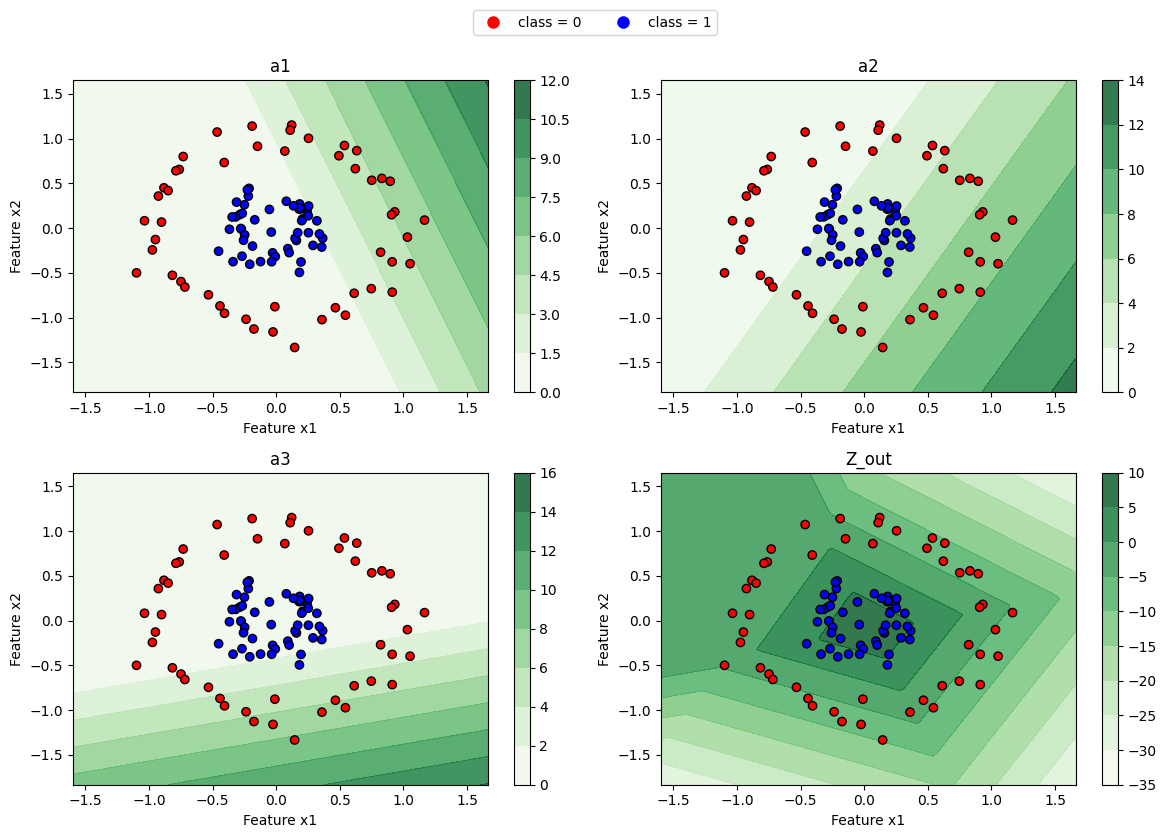

In [78]:
# Define a custom colormap for y=0 (red) and y=1 (blue)
custom_cmap = ListedColormap(["red", "blue"])

# Plot the contributions of individual neurons and the weighted sum
fig = plt.figure(figsize=(12, 8))

# Loop over each row of the matrix A
for i, activation in enumerate(A, 1):
    plt.subplot(2, 2, i)
    contour = plt.contourf(x1_x1, x2_x_2, activation.reshape(x1_x1.shape), alpha=0.8, cmap="Greens")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=custom_cmap)  # Use the custom colormap
    plt.title(f"a{i}")
    plt.xlabel("Feature x1")
    plt.ylabel("Feature x2")
    plt.colorbar(contour)

# Plot the weighted sum
plt.subplot(2, 2, 4)
contour = plt.contourf(x1_x1, x2_x_2, Z_out.reshape(x1_x1.shape), alpha=0.8, cmap="Greens")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=custom_cmap)  # Use the custom colormap
plt.title("Z_out")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.colorbar(contour)

# Add a legend at the top of the whole figure
fig.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='class = 0'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='class = 1')
    ],
    loc='upper center',
    ncol=2,
    bbox_to_anchor=(0.5, 1.05)
)

# Adjust layout and show the plot
plt.tight_layout()  # Leave space for the top legend

# Save the plot
plt.savefig('a1_a2_a3_z_out.png', dpi=150)

plt.show()

### Calculate Z_out for x1, x2 closed to zero

The pair of x1 and x2 closed to zero is located in the dark green region, which corresponds to value of Z_out between 5 and 10.

We will calculate the value of Z_out for this pair of x1 and x2, and we expect Z_out to range from 5 to 10.

In [79]:
# Define the threshold for closeness to 0
threshold = 0.1

# Find the indice where both X[:, 0] and X[:, 1] are close to 0
close_to_zero_indice = np.where((np.abs(X[:, 0]) < threshold) & (np.abs(X[:, 1]) < threshold))[0]

# Isolate the rows that satisfy the condition
x1_x2_close_to_zero = X[close_to_zero_indice]
x1_x2_close_to_zero

array([[-0.03880452, -0.04479644]])

In [80]:
x1_x2_close_to_zero.shape

(1, 2)

In [81]:
hidden_weights

array([[ 4.78305205,  1.67070927],
       [ 3.66456106, -1.85871218],
       [ 1.62693721, -6.64596555]])

In [82]:
hidden_weights.shape

(3, 2)

In [83]:
hidden_biases

array([[-0.09930127],
       [ 3.20397825],
       [-0.80262292]])

In [84]:
hidden_biases.shape

(3, 1)

In [85]:
output_weights

array([[-4.5043373 ,  3.21899688, -3.30185787]])

In [86]:
output_weights.shape

(1, 3)

In [87]:
output_bias

array([[-2.27316187]])

In [88]:
output_bias.shape

(1, 1)

In [89]:
z1_z2_z3 = (np.dot(hidden_weights, x1_x2_close_to_zero.T)) + hidden_biases
z1_z2_z3

array([[-0.35974712],
       [ 3.14504042],
       [-0.56803983]])

In [90]:
z1_z2_z3.shape

(3, 1)

In [91]:
a1_a2_a3 = np.maximum(0, z1_z2_z3)
a1_a2_a3

array([[0.        ],
       [3.14504042],
       [0.        ]])

In [92]:
a1_a2_a3.shape

(3, 1)

In [93]:
output_weights

array([[-4.5043373 ,  3.21899688, -3.30185787]])

In [94]:
output_weights.shape

(1, 3)

In [95]:
output_bias

array([[-2.27316187]])

In [96]:
# As expected the value of z_out falls between 5 and 10.
z_out = np.dot(a1_a2_a3.T, output_weights.T) + output_bias
z_out

array([[7.85071342]])